# Question 1 
> Part 1 Bootstrap the OIS Discount Factor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, brentq

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('IR Data.xlsx',sheet_name='OIS')
data = data.iloc[:,0:3]
data

,Tenor,Product,Rate
0,6m,OIS,0.00250
1,1y,OIS,0.00300
2,2y,OIS,0.00325
3,3y,OIS,0.00335
4,4y,OIS,0.00350
5,5y,OIS,0.00360
6,7y,OIS,0.00400
7,10y,OIS,0.00450
8,15y,OIS,0.00500
9,20y,OIS,0.00525


In [3]:
data['Tenor'] = data['Tenor'].apply(lambda x: (float(x[0:-1])/12 if x[-1] == 'm' else float((x[0:-1]))))
# calculate the discount_factor for the tenor 0.5
DF_6m = [1/(1+0.5*data.Rate[0])]

In [4]:
# focous on the tenor after 0.5 year
Tenor_List = list(data.Tenor[1:].astype(int))
OIS_List = list(data.Rate[1:])
DF = []

In [5]:
# interpolate all the discount factors between the Pre_Tenor and The Tenor we try to Calculate
# for example, when we try to calculate the 7y to 10y tenor, we need to interpolate 8y,9y tenor. 
def Interpolate(Pre_Tenor,Tenor, DF, DF_New):
    Missing_Tenor = list(range(Pre_Tenor + 1, Tenor))
    return np.interp(Missing_Tenor, [Pre_Tenor, Tenor], [DF[-1], DF_New])

In [6]:
def Discount_Factor(DF_New, Tenor):
    DF_Sum = sum(DF)
    
    if Tenor <= 5:
        Fix = (DF_Sum + DF_New) * OIS_List[Tenor_List.index(Tenor)]        
    else:
        Pre_Tenor = Tenor_List[Tenor_List.index(Tenor)-1]
        DF_Inter = Interpolate(Pre_Tenor,Tenor,DF, DF_New)        
        Fix = (DF_Sum + DF_New + DF_Inter.sum())* OIS_List[Tenor_List.index(Tenor)]
    
    # floating leg is always 1 - the last DF. We will prove this in our report
    Float = 1 - DF_New
    
    return Fix - Float

In [7]:
for i in Tenor_List:
    DF_New = brentq(lambda x: Discount_Factor(x, i), 0.1, 1)
    if i <=5:
        DF.append(DF_New)
    else:
        Pre_Tenor = Tenor_List[Tenor_List.index(i)-1]
        inter = Interpolate(Pre_Tenor, i, DF,DF_New)
        DF.extend(inter) # include all the interpolate values
        DF.append(DF_New) # after append all the interpolation, then append the 

In [8]:
DF_6m.extend(DF)
DF_All_Tenor = DF_6m
Tenor_list = [0.5] + [x for x in range(1, 31)]
OIS_Discount_Factor = pd.DataFrame({"Tenor":Tenor_list, 'Product':'OIS','OIS_Discount':DF_All_Tenor})
OIS_Discount_Factor

,Tenor,Product,OIS_Discount
0,0.5,OIS,0.998752
1,1.0,OIS,0.997009
2,2.0,OIS,0.993531
3,3.0,OIS,0.990015
4,4.0,OIS,0.986117
5,5.0,OIS,0.982184
6,6.0,OIS,0.977295
7,7.0,OIS,0.972406
8,8.0,OIS,0.966929
9,9.0,OIS,0.961453


In [9]:
OIS_Discount_Display = OIS_Discount_Factor[OIS_Discount_Factor.Tenor.isin(data['Tenor'])]
OIS_Discount_Display

,Tenor,Product,OIS_Discount
0,0.5,OIS,0.998752
1,1.0,OIS,0.997009
2,2.0,OIS,0.993531
3,3.0,OIS,0.990015
4,4.0,OIS,0.986117
5,5.0,OIS,0.982184
7,7.0,OIS,0.972406
10,10.0,OIS,0.955977
15,15.0,OIS,0.927611
20,20.0,OIS,0.900076


Text(0.5, 1.0, 'OIS Discount Curve')

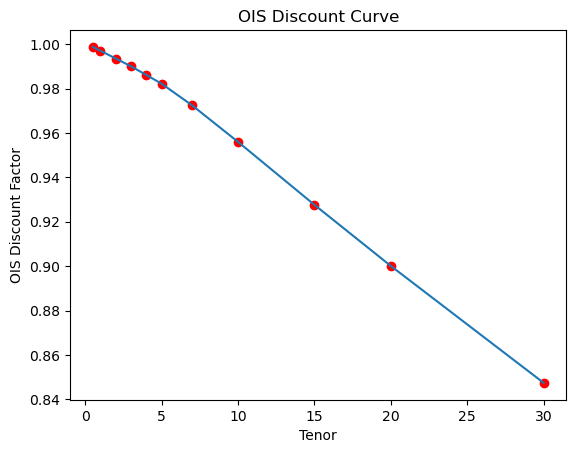

In [10]:
plt.scatter(OIS_Discount_Display.Tenor, OIS_Discount_Display.OIS_Discount, c = 'r')
plt.plot(OIS_Discount_Display.Tenor, OIS_Discount_Display.OIS_Discount)
plt.ylabel('OIS Discount Factor')
plt.xlabel('Tenor')
plt.title('OIS Discount Curve')

> Part 2 Bootstrap the LIBOR Discount Factor

In [11]:
IRS =pd.read_excel('IR Data.xlsx',sheet_name='IRS')
IRS

,Tenor,Product,Rate,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,6m,LIBOR,0.0250,NaN,Day Count Convention,30/360
1,1y,IRS,0.0280,NaN,Fixed Leg Freq,Semi-annual
2,2y,IRS,0.0300,NaN,Floating Leg Freq,Semi-annual
3,3y,IRS,0.0315,NaN,NaN,NaN
4,4y,IRS,0.0325,NaN,NaN,NaN
5,5y,IRS,0.0330,NaN,NaN,NaN
6,7y,IRS,0.0350,NaN,NaN,NaN
7,10y,IRS,0.0370,NaN,NaN,NaN
8,15y,IRS,0.0400,NaN,NaN,NaN
9,20y,IRS,0.0450,NaN,NaN,NaN


In [12]:
IRS['Tenor'] = IRS['Tenor'].apply(lambda x: (float(x[0:-1])/12 if x[-1] == 'm' else float((x[0:-1]))))

In [13]:
# set up a new dataframe to store semi-annual discount factors
empty_df = pd.DataFrame(np.zeros((60,2)),columns=['Tenor','OIS_Discount'])
empty_df['Tenor'] = np.linspace(0.5, 30, 60)

In [14]:
empty_df = empty_df.set_index('Tenor')
OIS_Discount_Factor = OIS_Discount_Factor.set_index('Tenor')
empty_df['OIS_Discount'] = OIS_Discount_Factor['OIS_Discount']

In [15]:
# fill NaN values using linear Interpolation
empty_df['OIS_Discount'] = empty_df['OIS_Discount'].interpolate() 
DF_OIS = empty_df['OIS_Discount'].tolist()

In [16]:
empty_df.head()

,OIS_Discount
Tenor,
0.5,0.998752
1.0,0.997009
1.5,0.995270
2.0,0.993531
2.5,0.991773


In [17]:
def Interpolate_New(T, DF_new, DF_Libor):
    pre_tenor = tenor_list[tenor_list.index(T)-1]
    missing_tenor = np.arange(pre_tenor, T, 0.5)[1:] # interpolate all the missing tenor 
    missing_DF = np.interp(missing_tenor, [pre_tenor, T], [DF_Libor[-1], DF_new])
    return missing_DF

In [18]:
tenor_list = list(IRS['Tenor'].astype(int))
tenor_list[0] = 0.5
tenor_list 

[0.5, 1, 2, 3, 4, 5, 7, 10, 15, 20, 30]

In [19]:
def finding_new(T, DF_OIS, DF_Libor, DF_new):    
    
    # fixed leg
    DF_sum = sum(DF_OIS[:int(2*T)])
    
    Fix = 0.5 * DF_sum * IRS[IRS.Tenor == T]['Rate']
    
    # floating leg
    
    if T == 0.5: 
        
        Float_sum = DF_OIS[0] * (1-DF_new)/DF_new 
    
    elif T == 1:
        Float1 = DF_OIS[0] * 0.025 * 0.5
        Float2 = DF_OIS[1] * (DF_Libor[-1] - DF_new) / DF_new
        Float_sum = Float1 + Float2
        
    else:
    
        dis_inter = Interpolate_New(T, DF_new, DF_Libor)
        a = DF_Libor + list(dis_inter)
        
        Float1 = DF_OIS[0]*(1-a[0])/a[0]
        
        Float2 = 0
        for i in range(1, int(2*T-1)):
            
            Float2 += DF_OIS[i] * ((a[i-1] - a[i])/a[i])
                
        Float_sum = Float1 + Float2 + DF_OIS[2*T-1] * ((a[-1] - DF_new) / DF_new)
            
    
    return Fix - Float_sum


In [20]:
DF_Libor = []
for i in tenor_list:
    df_new = brentq(lambda x : finding_new(i, DF_OIS, DF_Libor, x), 0.0001, 1)
    if i <= 1:
        DF_Libor.append(df_new)
    else:
        dis_inter = Interpolate_New(i, df_new, DF_Libor)
        DF_Libor.extend(dis_inter)
        DF_Libor.append(df_new)

In [21]:
empty_df.head(10)

,OIS_Discount
Tenor,
0.5,0.998752
1.0,0.997009
1.5,0.995270
2.0,0.993531
2.5,0.991773
3.0,0.990015
3.5,0.988066
4.0,0.986117
4.5,0.984150


In [22]:
empty_df['Libor_DF'] = DF_Libor
empty_df = empty_df.reset_index()
Combined_LIBOR_OIS_Discount = empty_df.loc[empty_df.Tenor.isin(IRS['Tenor'])]
Combined_LIBOR_OIS_Discount

,Tenor,OIS_Discount,Libor_DF
0,0.5,0.998752,0.987654
1,1.0,0.997009,0.972577
3,2.0,0.993531,0.942179
5,3.0,0.990015,0.910482
7,4.0,0.986117,0.878981
9,5.0,0.982184,0.848989
13,7.0,0.972406,0.784216
19,10.0,0.955977,0.692710
29,15.0,0.927611,0.551081
39,20.0,0.900076,0.408218


Text(0.5, 1.0, 'LIBOR Discount Curve')

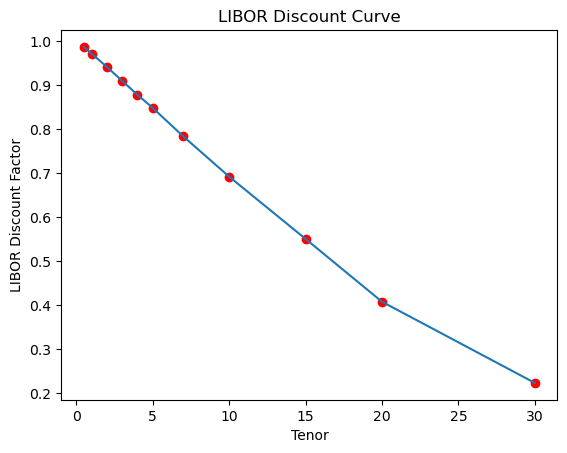

In [23]:
plt.scatter(Combined_LIBOR_OIS_Discount.Tenor, Combined_LIBOR_OIS_Discount.Libor_DF,c = 'r')
plt.plot(Combined_LIBOR_OIS_Discount.Tenor,  Combined_LIBOR_OIS_Discount.Libor_DF)
plt.ylabel('LIBOR Discount Factor')
plt.xlabel('Tenor')
plt.title('LIBOR Discount Curve')

> Part 3 Calculate The Forward Swap Rate

In [24]:
Expiry = ['1Y', '5Y', '10Y']
Tenor = ['1Y', "2Y", '3Y', '5Y', '10Y']

In [25]:
fsw = []
for ex in Expiry:
    for te in Tenor:
        i = int(ex.strip()[:-1])
        j = int(te.strip()[:-1])
        deno = 0.5*sum(empty_df.OIS_Discount[2*i:2*(i+j)])
        
        terms = []
        for x in range(2*i, 2*(i+j)):
            no = empty_df.OIS_Discount[x] * (empty_df.Libor_DF[x-1] - empty_df.Libor_DF[x])/empty_df.Libor_DF[x]
            terms.append(no)
        numer = sum(terms)
        
        fsw.append(numer/deno)

In [26]:
fsw_array = np.array(fsw).reshape(3, 5)
forward_swap = pd.DataFrame(fsw_array, columns = Tenor, index = Expiry)
forward_swap

,1Y,2Y,3Y,5Y,10Y
1Y,0.032007,0.033259,0.034011,0.035255,0.038428
5Y,0.039274,0.040075,0.040072,0.041093,0.043634
10Y,0.042189,0.043116,0.044097,0.046249,0.053458


> Prepare Some Useful Datas For the Question 2

In [27]:
forward_swap.to_csv('forward_swap_rate.csv')

In [28]:
# get 2x10 forward swap rate
deno = 0.5*sum(empty_df.OIS_Discount[2*2:2*(2+10)])
        
terms = []
for x in range(2*2, 2*(2+10)):
    no = empty_df.OIS_Discount[x] * (empty_df.Libor_DF[x-1] - empty_df.Libor_DF[x])/empty_df.Libor_DF[x]
    terms.append(no)
numer = sum(terms)
numer/deno

0.03963437677316923

In [29]:
# get 8x10 forward swap rate

deno = 0.5*sum(empty_df.OIS_Discount[2*8:2*(8+10)])
        
terms = []
for x in range(2*8, 2*(8+10)):
    no = empty_df.OIS_Discount[x] * (empty_df.Libor_DF[x-1] - empty_df.Libor_DF[x])/empty_df.Libor_DF[x]
    terms.append(no)
numer = sum(terms)

numer/deno

0.048711148942117935

In [30]:
# get and save the yearly discount factor
yearly_DF = empty_df[empty_df.Tenor % 1 == 0]
yearly_DF.to_csv('yearly_DF.csv')

In [32]:
empty_df.to_csv('discount_factor.csv', index = False)